<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/Lasso_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso Regresyon

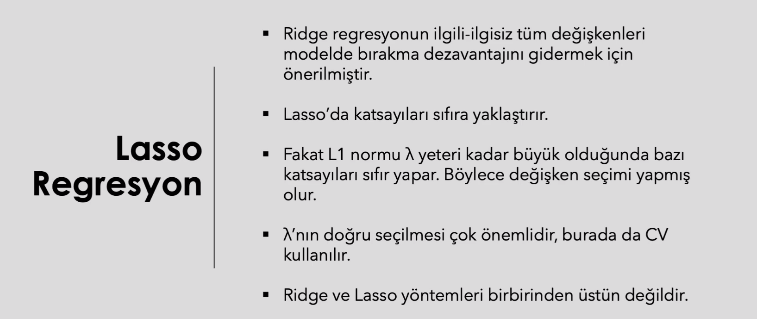

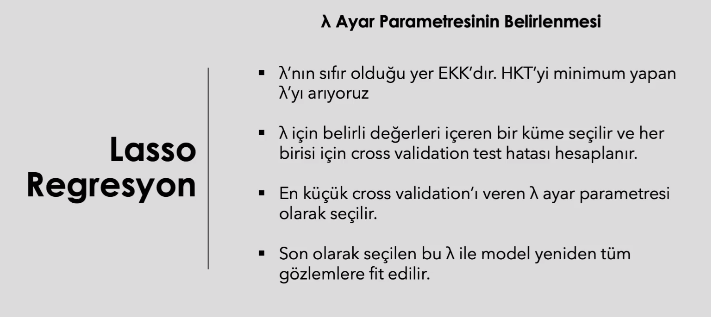

Ridge'ten farkı katsayıların cezalarını onları 0 yapacak şekilde uygulamak.

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [ ]:
lasso_model

Lasso(alpha=0.1)

In [ ]:
#Katsayılar
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

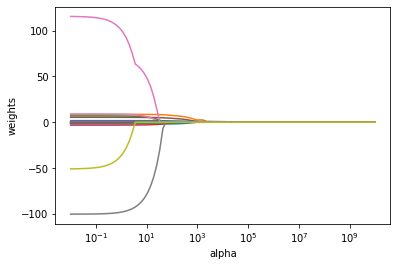

In [ ]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin 

In [ ]:
#Bağımlı değişkenin değerleri
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
#Tahmin edilen değerler üzerinden test hatası
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148771

## Model Tuning

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [ ]:
lasso_cv_model.alpha_

0.39406126432470073

In [ ]:
#Tune edilmiş lasso
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [ ]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.39406126432470073)

In [ ]:
# Tahmin işlemi
y_pred = lasso_tuned.predict(X_test)

In [ ]:
# Hata
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958366

# ElasticNet Regresyonu

Rigde tarzı cezalandırma
Lasso tarzı seçme işlemi

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enet_model = ElasticNet().fit(X_train, y_train)

In [ ]:
#Katsayılar
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [ ]:
#Sabit
enet_model.intercept_

-6.465955602112331

## Tahmin

In [ ]:
#Model
enet_model

ElasticNet()

In [ ]:
#Test seti için tahmin değerleri
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [ ]:
y_pred = enet_model.predict(X_test)

In [ ]:
#MSE test hatası
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [ ]:
#Açıklanabilirlik oranı
r2_score(y_test, y_pred)

0.41070222469326867

## Model Tuning

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
#Model kurulumu
enet_cv_model = ElasticNetCV(cv = 10, 
                             random_state = 0).fit(X_train, y_train)

In [ ]:
# Optimum alpha değeri
enet_cv_model.alpha_

5230.7647364798695

In [ ]:

enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [ ]:
#Tune edilmiş model
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [ ]:
#y tahmin edğerler
y_pred = enet_tuned.predict(X_test)

In [ ]:
# Test MSE
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795